## Introducción a la programación estadística con Python y Pandas, parte 02

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('dgii_clean.csv',sep=',', encoding="ISO-8859-1")
ene = df[df.mes == 'ene-16']
ene.genero.value_counts()

F    1598
M    1105
Name: genero, dtype: int64

In [3]:
spg = ene.groupby(by=['puesto_clean']).filter(lambda x: (len(x[x.genero == 'F']) > 9) and (len(x[x.genero == 'M']) > 9))
spg.puesto_clean.value_counts()

conserje                                            144
oficial ctrl contrib a                               80
auditor interno a                                    70
tasador                                              62
oficial ctrl contrib c                               57
encargado unidad c                                   57
encargado seccion                                    54
auxiliar archivo                                     52
auditor externo c                                    50
auxiliar informacion y atencion al contribuyente     50
analista                                             49
auditor interno c                                    48
auxiliar                                             45
tec gestion servicios b                              34
tec vehiculos motor                                  33
encargado seccion c                                  31
mensajero interno                                    31
oficial de alcoholes y tabacos                  

### f-Quantile

$$f_i = \frac{(i - 0.5)}{n}$$

In [67]:
puesto = ene[ene.puesto_clean == 'auditor interno a']
mujeres = puesto.genero.value_counts()['F'] 
hombres = puesto.genero.value_counts()['M']
#
quantile_mujeres = (np.arange(1, mujeres+1) - 0.5) / mujeres
quantile_hombres = (np.arange(1, hombres+1) - 0.5) / hombres
#
salario_mujeres = np.sort(puesto.salario[puesto.genero == 'F'])
salario_hombres = np.sort(puesto.salario[puesto.genero == 'M'])
#
print("Mujeres {:d}\t Hombres {:d}".format(mujeres, hombres))

Mujeres 55	 Hombres 15


In [66]:
pd.DataFrame({'Quantile': quantile_mujeres, 'Salario': salario_mujeres}).head(10)

,Quantile,Salario
0,0.009091,42333.0
1,0.027273,45679.0
2,0.045455,45679.0
3,0.063636,45679.0
4,0.081818,45679.0
5,0.100000,45679.0
6,0.118182,45679.0
7,0.136364,45679.0
8,0.154545,45679.0
9,0.172727,45679.0


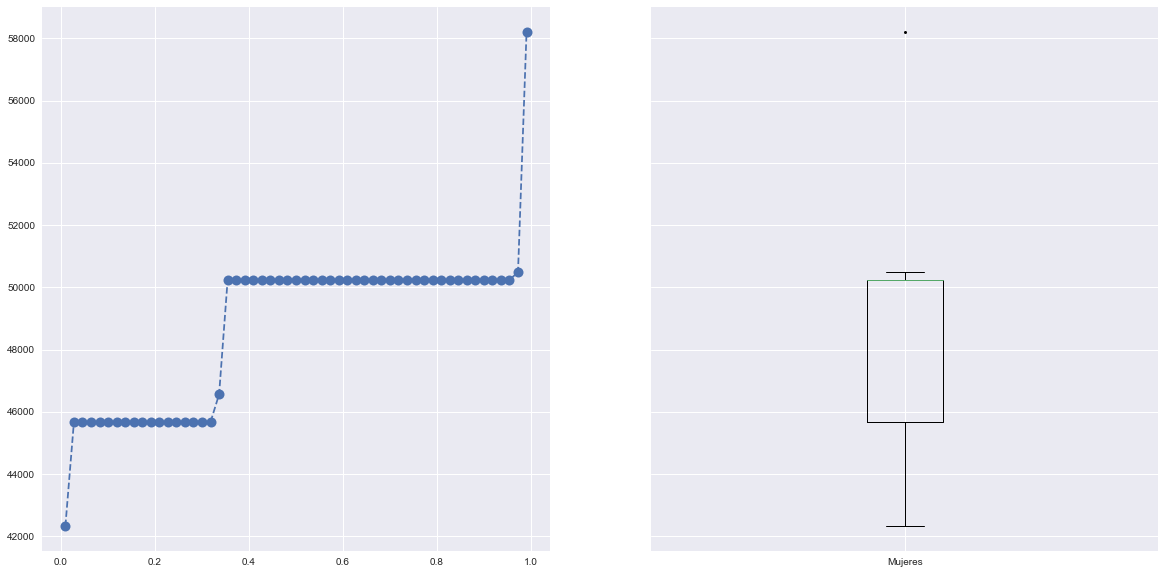

In [61]:
_, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(20,10))
ax1.plot(quantile_mujeres, salario_mujeres, marker='.', markersize=20, linestyle='dashed', label='Mujeres')
ax2.boxplot([salario_mujeres], labels=['Mujeres'], sym = 'k.', showcaps = True, showfliers = True)
plt.show()

In [65]:
pd.DataFrame({'Quantile': quantile_hombres, 'Salario': salario_hombres}).head(10)

,Quantile,Salario
0,0.033333,41112.0
1,0.100000,45679.0
2,0.166667,45679.0
3,0.233333,45679.0
4,0.300000,45679.0
5,0.366667,45679.0
6,0.433333,50247.0
7,0.500000,50247.0
8,0.566667,50247.0
9,0.633333,50247.0


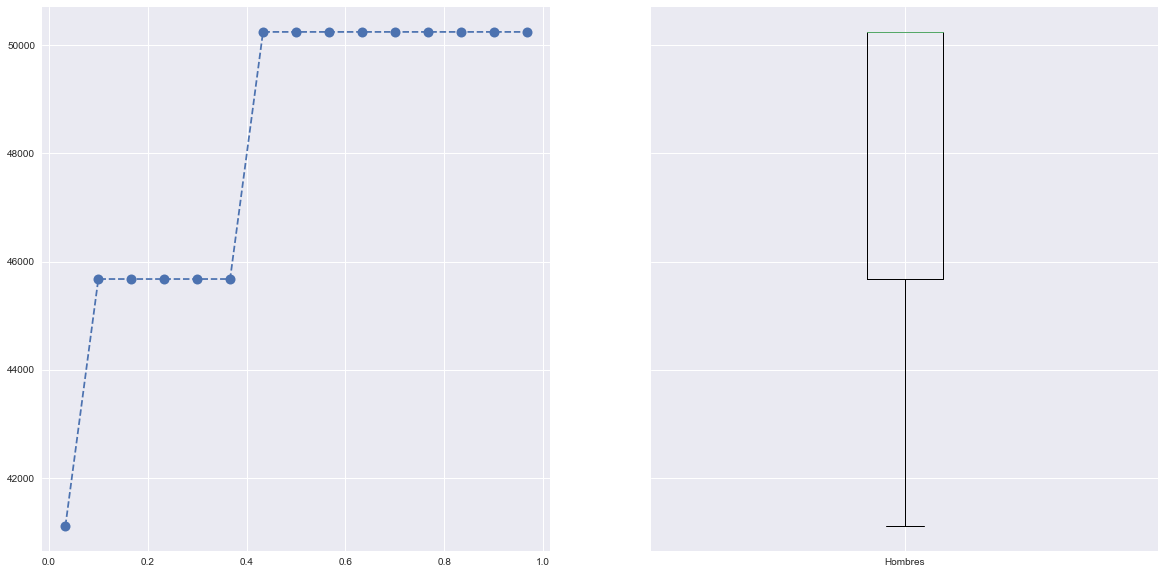

In [63]:
_, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(20,10))
ax1.plot(quantile_hombres, salario_hombres, marker='.', markersize=20, linestyle='dashed', label='Mujeres')
ax2.boxplot([salario_hombres], labels=['Hombres'], sym = 'k.', showcaps = True, showfliers = True)
plt.show()

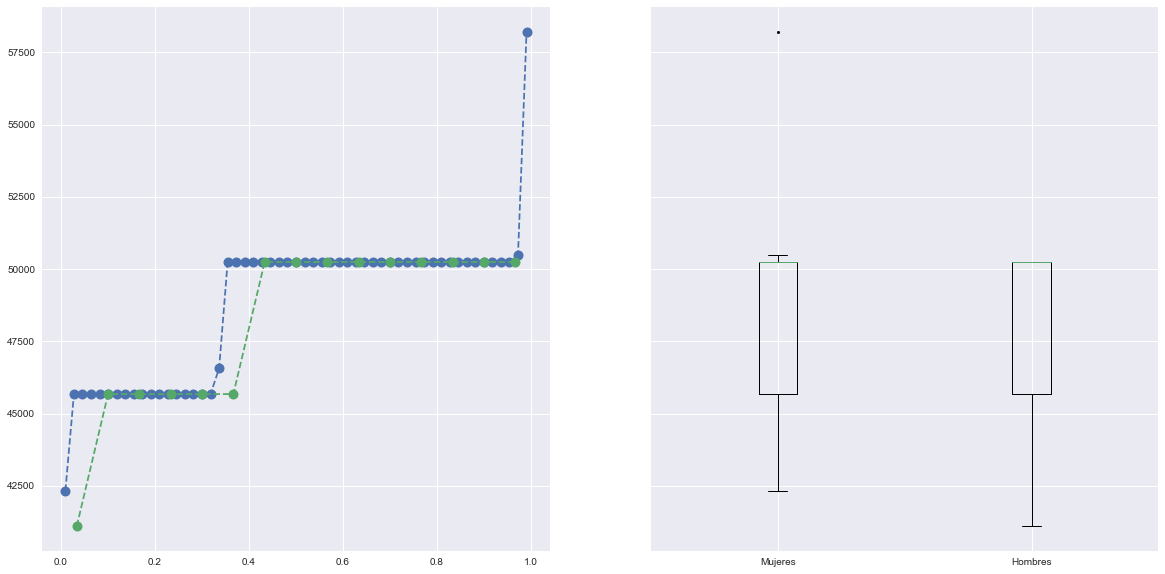

In [36]:
_, (ax1, ax2) = plt.subplots(1,2,sharey=True, figsize=(20,10))
ax1.plot(quantile_mujeres, salario_mujeres, marker='.', markersize=20, linestyle='dashed', label='Mujeres')
ax1.plot(quantile_hombres, salario_hombres, marker='.', markersize=20, linestyle='dashed', label='Hombres')
ax2.boxplot([salario_mujeres, salario_hombres], labels=['Mujeres','Hombres'], sym = 'k.', showcaps = True, showfliers = True)
plt.show()

## Empirical Cumulative Distribution Function
### Percentil

$$p_i = \frac{i}{n}$$

In [64]:
percentil_mujeres = np.arange(1, mujeres+1) / mujeres
percentil_hombres = np.arange(1, hombres+1) / hombres

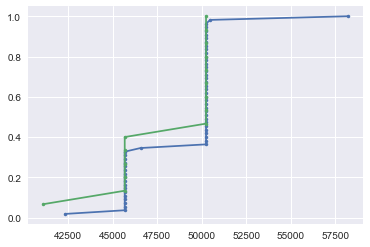

In [68]:
_ = plt.figure()
_ = plt.plot(salario_mujeres, percentil_mujeres, marker='.')
_ = plt.plot(salario_hombres, percentil_hombres, marker='.')
plt.show()

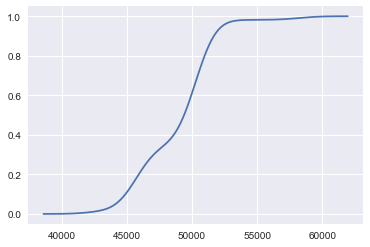

In [48]:
sns.kdeplot(salario_mujeres, cumulative=True)

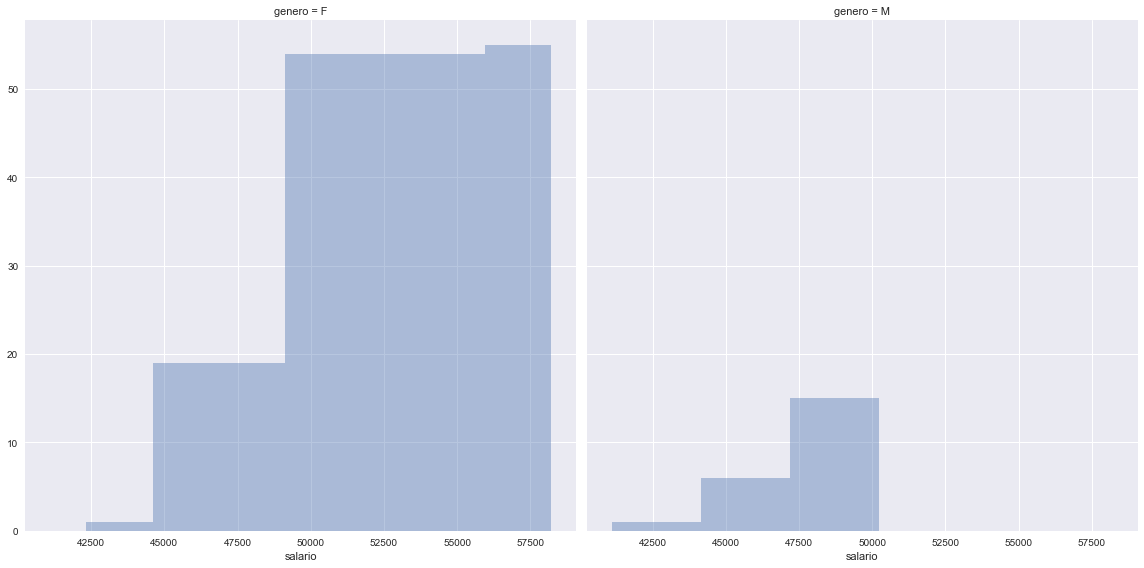

In [55]:
sns.FacetGrid(data=puesto, col='genero', size=8).map(sns.distplot,'salario', kde=False, hist_kws={'cumulative': True})

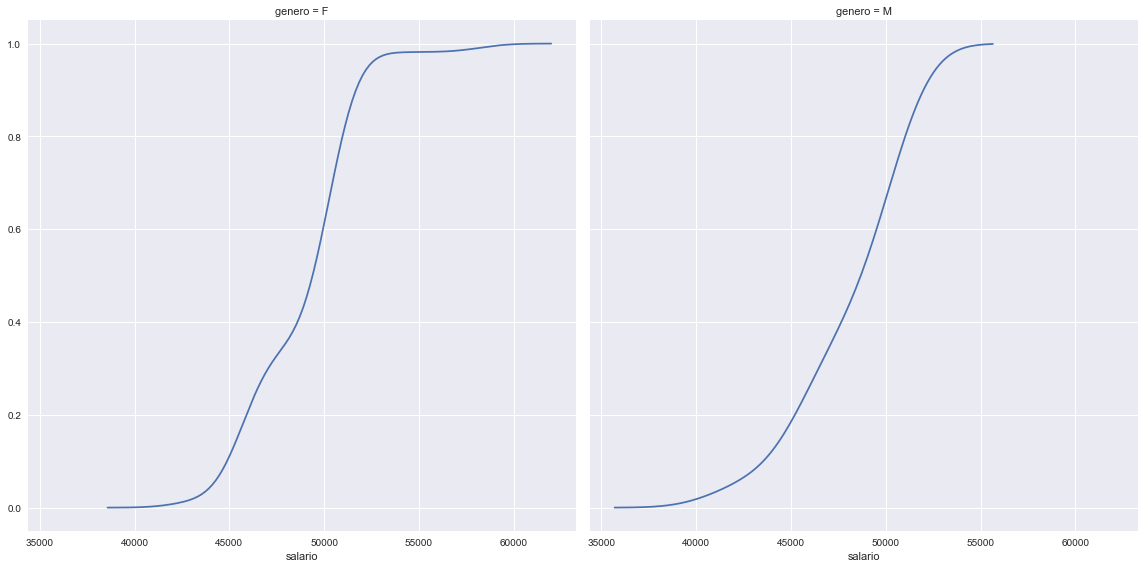

In [49]:
sns.FacetGrid(data=puesto, col='genero', size=8).map(sns.kdeplot,'salario', cumulative=True)

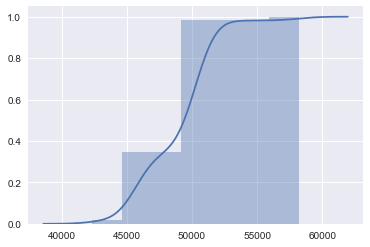

In [50]:
sns.distplot(salario_mujeres, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})

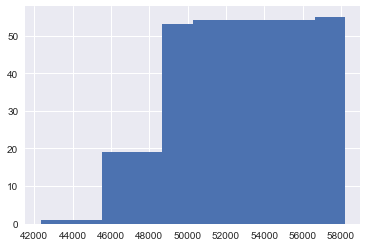